# Exploratory Data Analysis

# 0.0 Introduction

In this notebook I explore the data in search of finding meaningful insights. I will begin by reviewing each variable's distribution. Then I will take a look to see what type of relationships variables have with each other. After that I will list specific questions and answer them with statistical tests.

In [42]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

In [57]:
# load data
df = pd.read_csv("train.csv")

# change zipcode to the string data type
df["zipcode"] = df["zipcode"].astype(str)

# display
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long,sqft_living15,sqft_lot15,log_price,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15,mean_log_price_zip
0,622500.0,3,2.5,2290,14374,2.0,0,0,3,8,...,-122.074,2290,33450,13.341499,7.736307,7.736307,7.736307,9.573176,10.417807,13.532819
1,400000.0,3,2.5,2090,32718,2.0,1,4,3,7,...,-122.511,1200,192268,12.899220,7.346010,7.644919,7.090077,10.395681,12.166646,13.007341
2,455000.0,2,1.5,1310,12196,1.5,0,0,3,6,...,-122.122,2970,12196,13.028053,7.177782,7.177782,7.996317,9.408863,9.408863,13.327543
3,159075.0,4,1.5,1580,6200,1.0,0,0,3,6,...,-122.240,1320,6499,11.977131,6.672033,7.365180,7.185387,8.732305,8.779404,12.547945
4,555000.0,2,1.5,1780,4750,1.0,0,0,4,7,...,-122.395,1690,5962,13.226723,6.984716,7.484369,7.432484,8.465900,8.693161,13.213049


# 1.0 Univariate Analysis

In this section I will take a look at each column by itself.

## 1.1 Review Distributions

Now I will review the distributions of each variable using histograms.

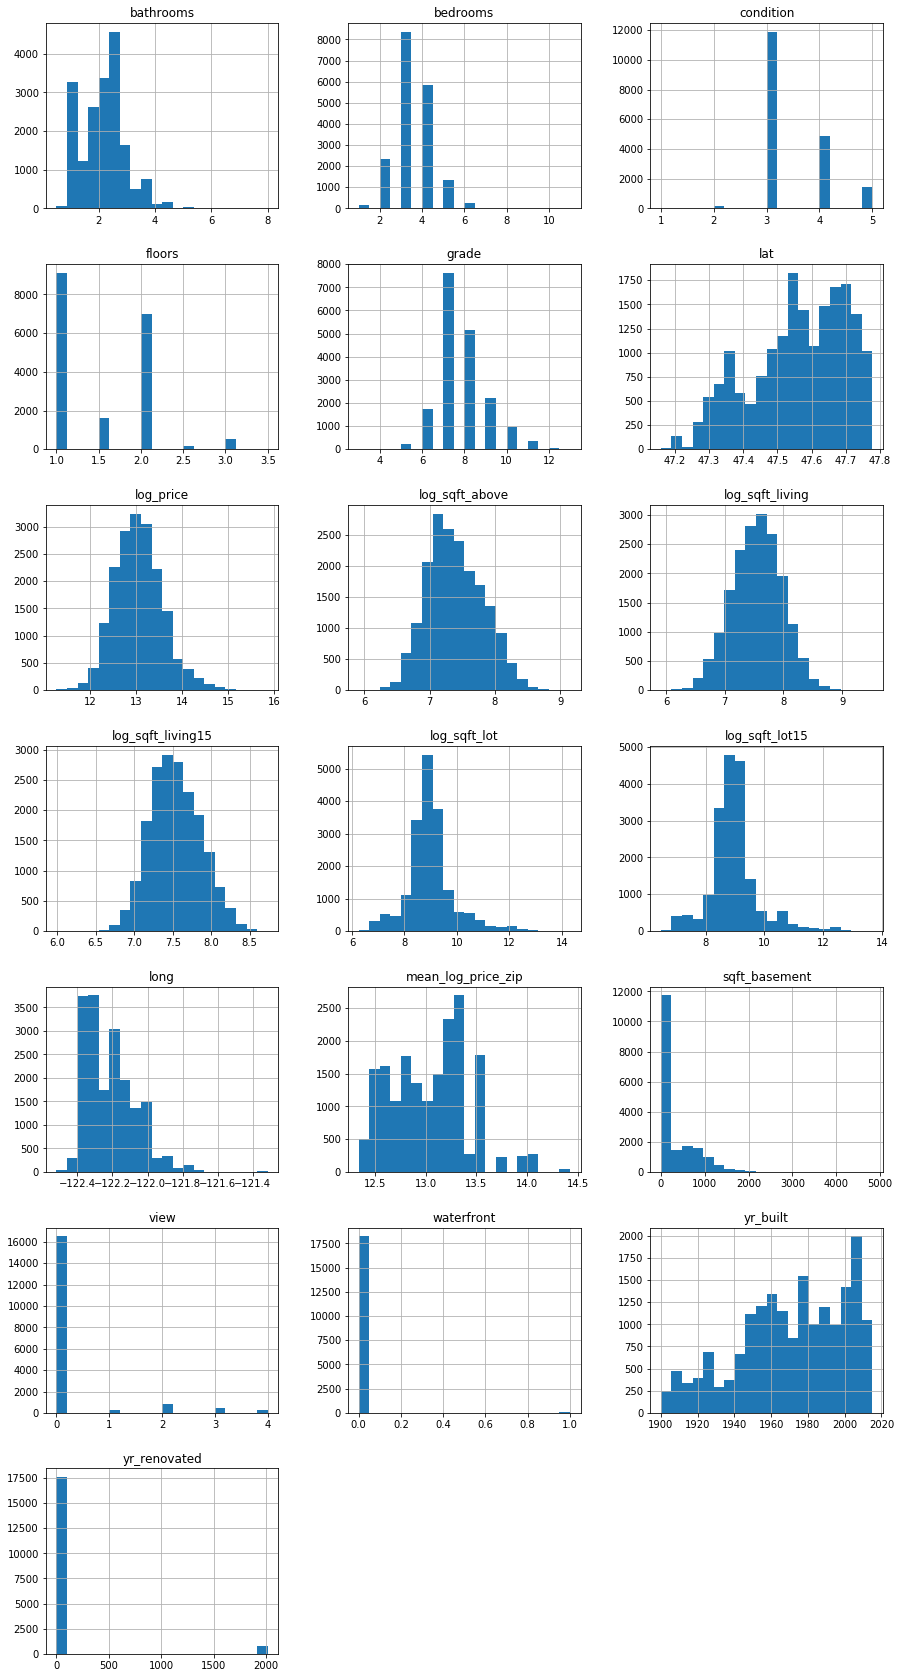

In [59]:
# plot histograms of each column
i_orig = [col for col in df.columns if "log_"+col not in df.columns]
df[i_orig].hist(layout=(7, 3), figsize=(15, 30), bins=20)
plt.show()

By looking at these distributions we can see:
* there are spikes where houses stick to one bathroom and/or one floor. 
* It is rare for a condition to be below 3.
* Good views, basements, and renovations are rare.
* Almost none of the houses are waterfront properties.
* The population density is greatest in the north west

## 1.2 Looking For Outliers

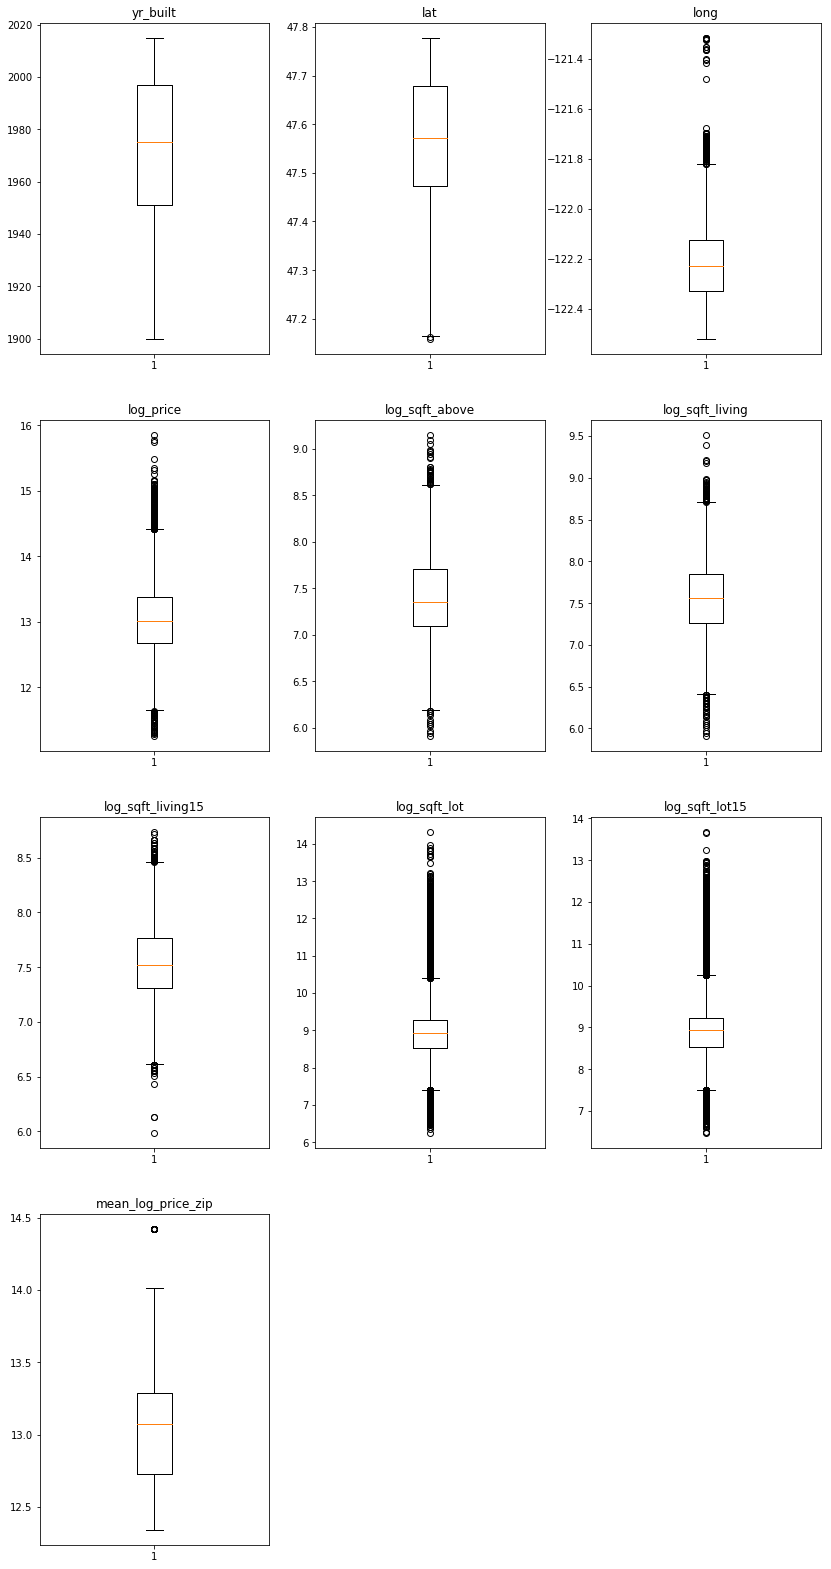

In [60]:
# select appopriate columns
boolean_cols = ["waterfront", "sqft_basement", "yr_renovated"]
catigor_cols = ["bathrooms", "bedrooms", "floors", "grade", "view", "condition", "zipcode"]
continu_cols = [col for col in df.columns if (col not in boolean_cols) & (col not in catigor_cols) & (col in i_orig)]

# create subplots
fig, axes = plt.subplots(4, 3, figsize=(14, 28))

# make boxplots
for n, col in  enumerate(continu_cols):
    
    i = n//3
    j = n%3
    
    ax = axes[i, j]
    
    ax.boxplot(df[col])
    ax.set_title(col)

axes[3, 1].set_visible(False)
axes[3, 2].set_visible(False)
plt.show()

We can see here that the log transformed columns have alot of outliers. Lets examine further to see exactly how much. I will also look to see if the houses that are outliers for sqft_living are also outliers for price.

In [61]:
# select log transformed columns
log_cols = [col for col in df.columns if col.startswith("log")]

# scale data
sc = StandardScaler()
scaled_data = sc.fit_transform(df.copy()[log_cols])
scaled_df = pd.DataFrame(scaled_data, columns=df[log_cols].columns)

In [62]:
# count how many values are more than 3 standard deviations from the mean
results = []

for col in log_cols:
    
    outlier_count = len(scaled_df[abs(scaled_df[col]) > 3])
    outlier_proportion = outlier_count / len(df)
    max_value = scaled_df[col].max()

    results.append([outlier_proportion, outlier_count, max_value])
    
olr_percent = pd.DataFrame(results, columns=["% outliers", "outlier count", "maximum scaled value"], index=log_cols)
olr_percent.sort_values(by="% outliers")

,% outliers,outlier count,maximum scaled value
log_sqft_living15,0.001526,28,3.648146
log_sqft_above,0.001853,34,4.115386
log_sqft_living,0.002888,53,4.632058
log_price,0.008228,151,5.324473
log_sqft_lot,0.017654,324,5.901764
log_sqft_lot15,0.017872,328,5.794010


There are a relatively small amount of outliers for each column but they are highly distant from the normal data points.


# 2.0 Bivariate Analysis


Here I will look to see what columns have relationships with one another.

## 2.1 Correlation With Price

First I will take a look at the columns to see which are the most correlated with price. This will provide some insight into what columns are the most useful so I can focus my analysis.

In [63]:
# find absolute value of correlations
# of each column and price
correlations = abs(df[i_orig].corr())["log_price"]

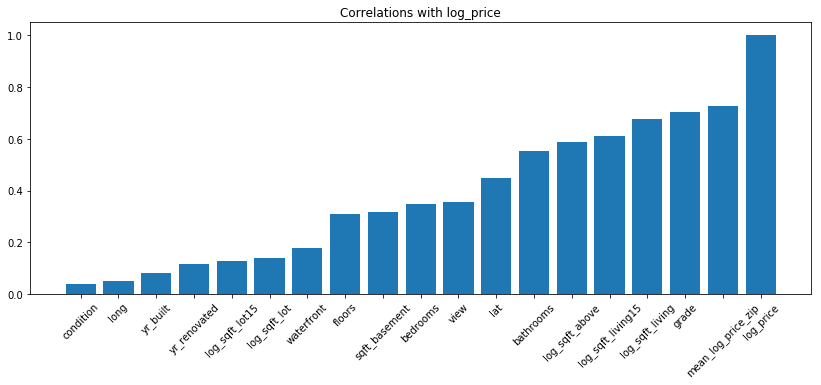

In [64]:
# get variable names and values in a nested list form
# using the dict() and .items() functions with the series
names_vals = dict(correlations).items()

# sort names and values based on value
names_vals = sorted(names_vals, key = lambda x: x[1])

# seperate names and values into two list
names = [x[0] for x in names_vals]
values = [x[1] for x in names_vals]

# create a bar plot
plt.figure(figsize=(14, 5))
plt.bar(names, values)
plt.xticks(rotation=45)
plt.title("Correlations with log_price")
plt.show()

## 2.1 Continuous Variables

Now I will take the some of the most promising continuos variables along with the log of price and plot them together to see if they have relationships.

In [65]:
# select some continuous columns highly correlated with price
promising_cols_1 = ["log_sqft_living", "log_sqft_living15", "log_sqft_above", "log_price"]

<Figure size 1008x720 with 0 Axes>

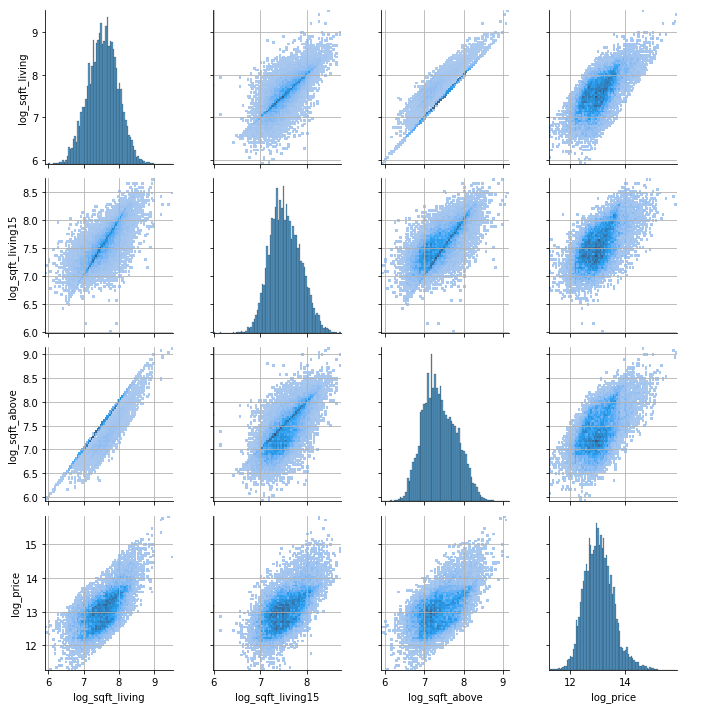

In [66]:
plt.figure(figsize=(14, 10))
sns.pairplot(df[promising_cols_1], kind="hist")
plt.show()

We can see here that all the features we selected here have a linear relationship with each other.

# 2.2 Categorical Columns

Here is a breakdown of prices by grade.

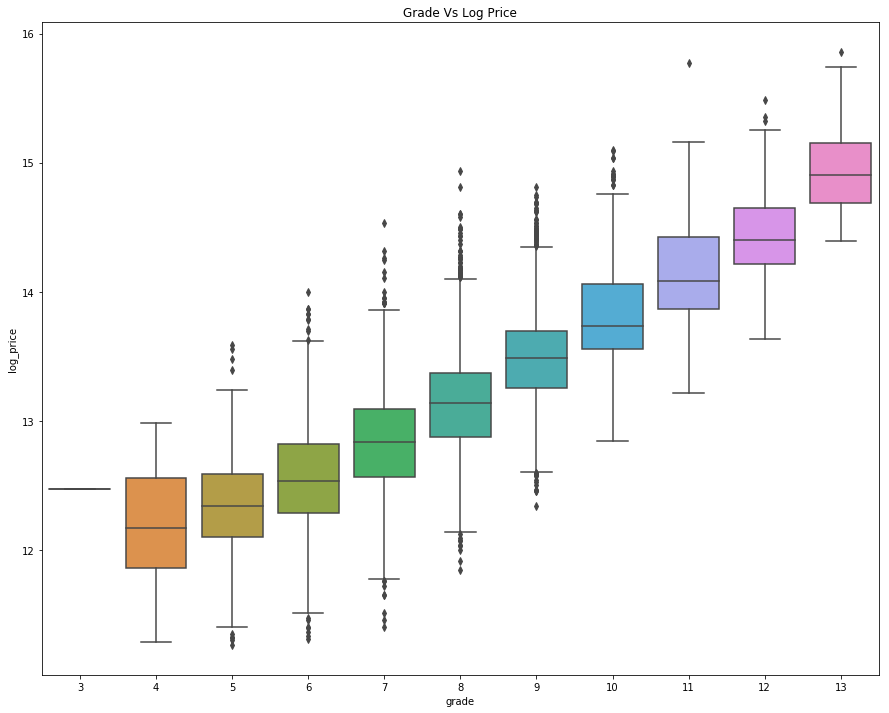

In [69]:
# plot distribution of the log of price for each grade
plt.figure(figsize=(15, 12))
sns.boxplot(data=df, x="grade", y="log_price")
plt.title("Grade Vs Log Price")
plt.show()

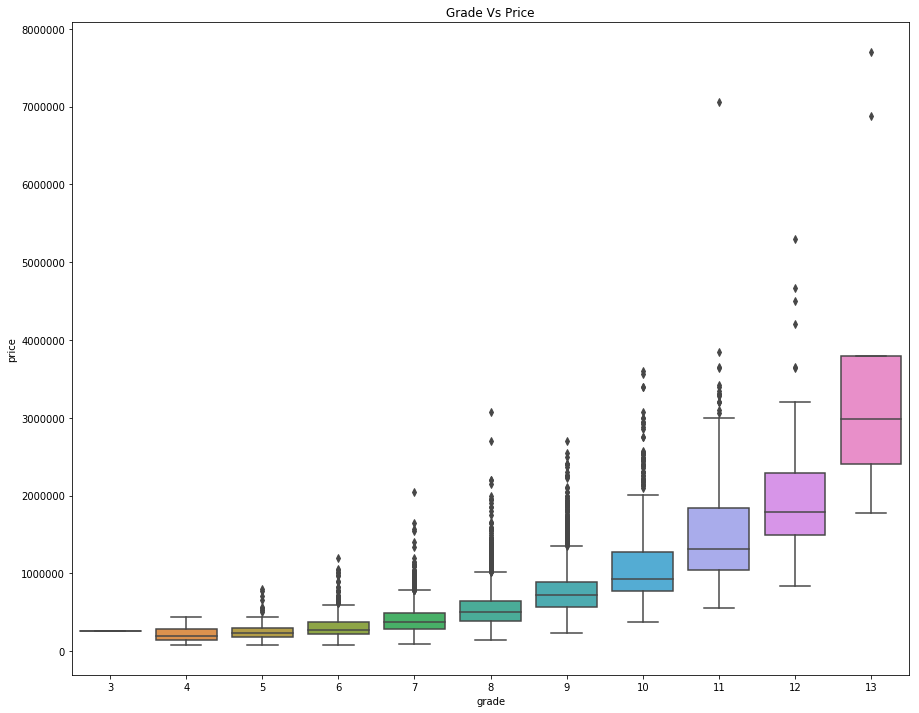

In [68]:
# plot grades against non-log-transformed price
plt.figure(figsize=(15, 12))
sns.boxplot(data=df, x="grade", y="price")
plt.title("Grade Vs Price")
plt.show()

The companies grading scale seems to be logarithmic. Meaning the log price goes up linearly with the grade. Grades 8 and 9 seem to have more outliers than the others. Lets follow this up with another look at the distribution of the houses by grade as well as a look at the standard deviations for each grade.

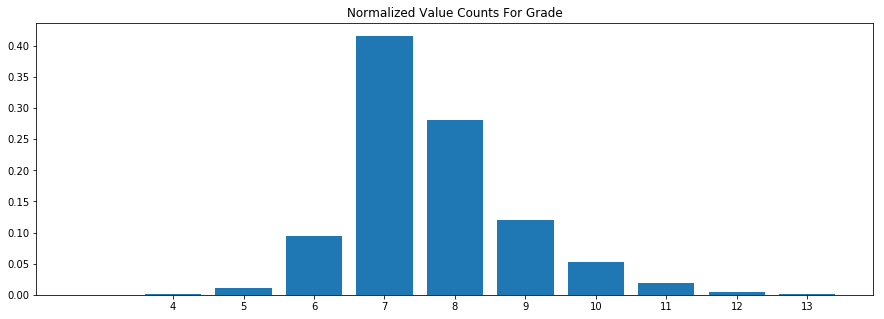

In [35]:
# plot the value counts for each grade
plt.figure(figsize=(15, 5))
vc_grade = df["grade"].value_counts(normalize=True)
plt.bar(vc_grade.index, vc_grade.values)
plt.xticks(list(range(4, 14)))
plt.title("Normalized Value Counts For Grade")
plt.show()

We can see that grades 8 and 9 do contain a large proportion of the data which could partially explain why they have more outliers.

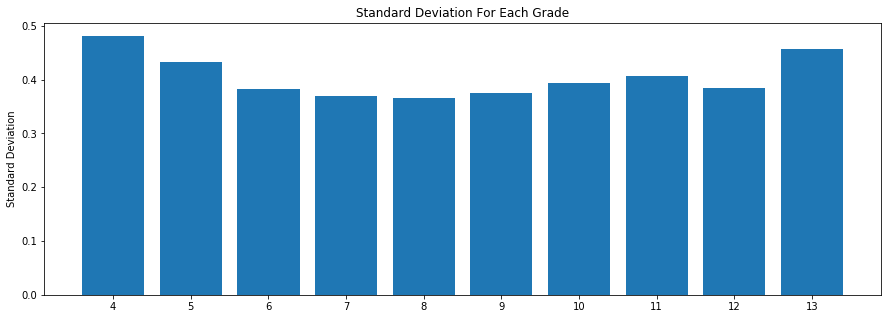

In [89]:
# display the standard deviation for each grade
stds_by_grade = df.groupby("grade")["log_price"].std()
plt.figure(figsize=(15, 5))
plt.bar(stds_by_grade.index, stds_by_grade.values)
plt.title("Standard Deviation For Each Grade")
plt.ylabel("Standard Deviation")
plt.xticks(list(range(4, 14)))
plt.show()

Even though there are more outliers in grades 8 and 9, there is actually more variance in price in the maximum and minimum grades.

Next up is the mean price per zipcode.

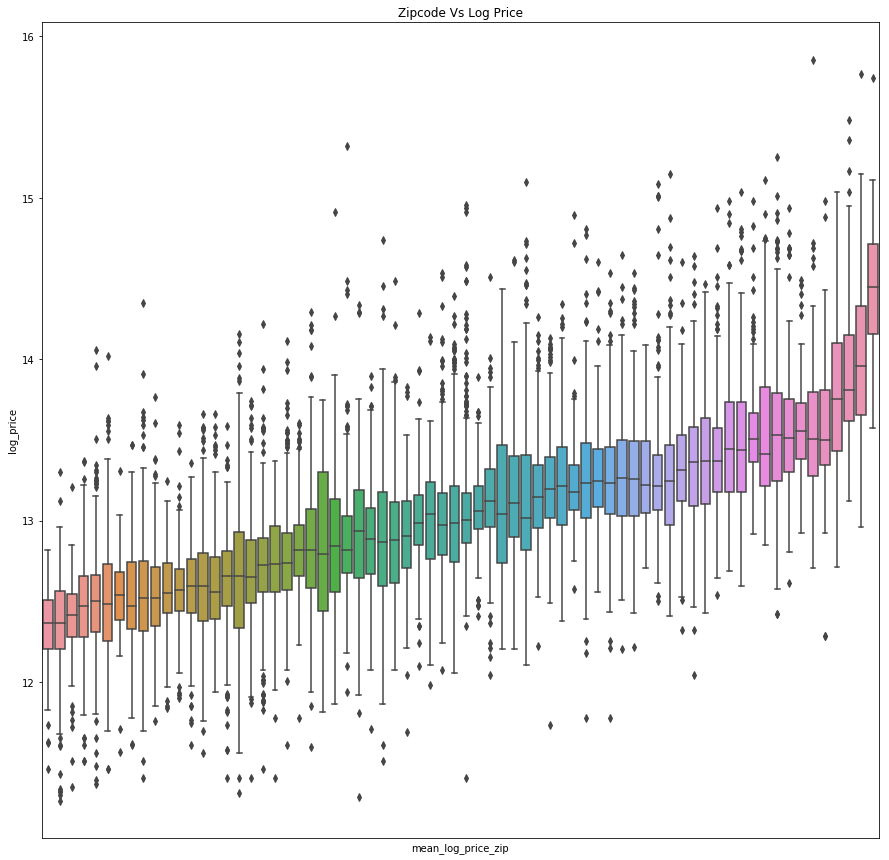

In [79]:
# plot zipcode vs log price
plt.figure(figsize=(15, 15))
sns.boxplot(data=df, x="mean_log_price_zip", y="log_price")
plt.title("Zipcode Vs Log Price")
plt.xticks([])
plt.show()

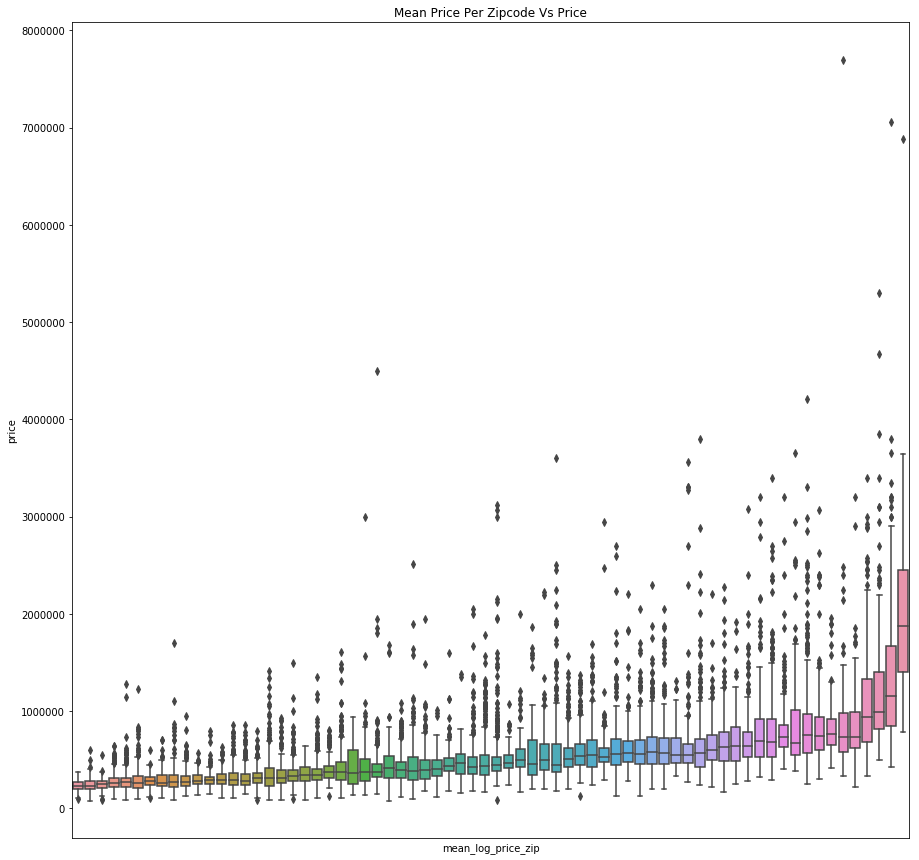

In [80]:
# plot zipcodes vs price
plt.figure(figsize=(15, 15))
sns.boxplot(data=df, x="mean_log_price_zip", y="price")
plt.title("Mean Price Per Zipcode Vs Price")
plt.xticks([])
plt.show()

We can see here that prices vary widely within zipcodes. Also the top 4 zipcodes stand out from the rest as they are particularly high in price and in variance.

Next let's look at the bathrooms.

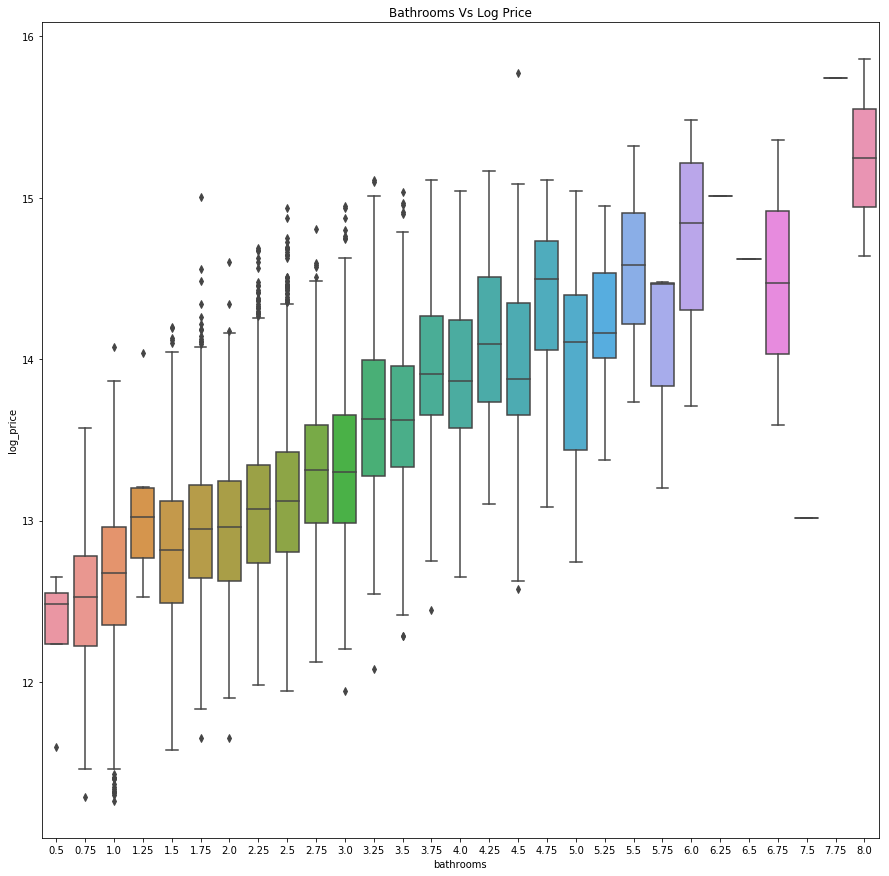

In [90]:
# plot bathrooms vs log price
plt.figure(figsize=(15, 15))
sns.boxplot(data=df, x="bathrooms", y="log_price", order=sorted(df["bathrooms"].unique()))
plt.title("Bathrooms Vs Log Price")
plt.show()

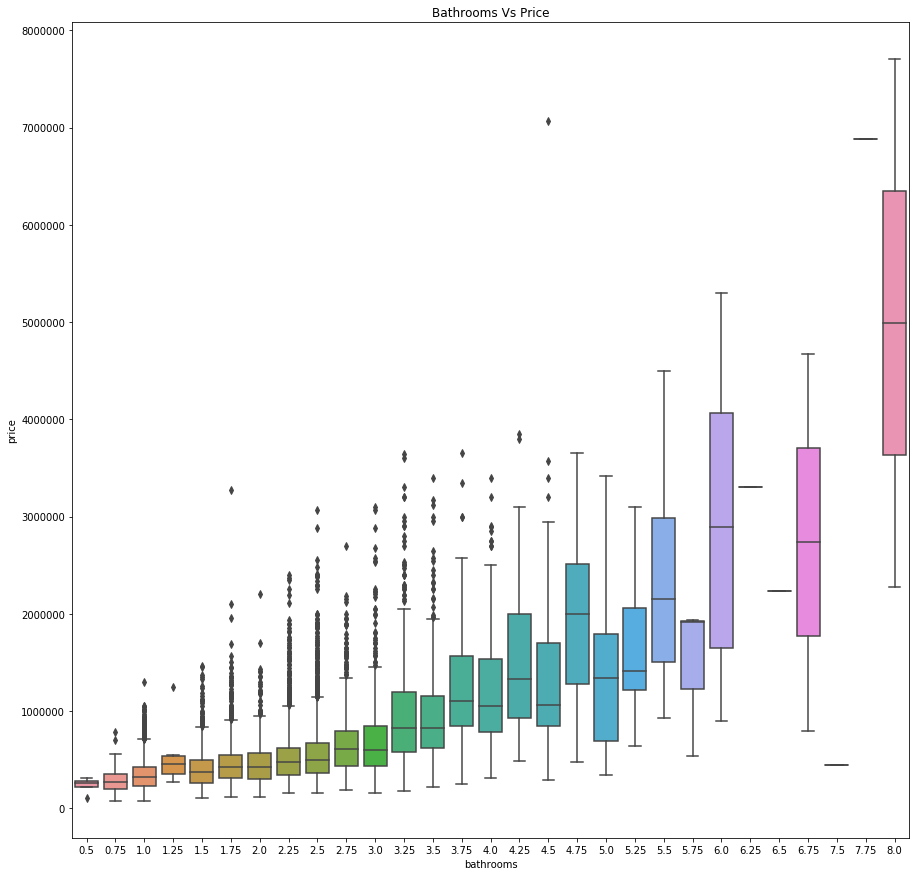

In [91]:
# plot bathrooms vs price
plt.figure(figsize=(15, 15))
sns.boxplot(data=df, x="bathrooms", y="price", order=sorted(df["bathrooms"].unique()))
plt.title("Bathrooms Vs Price")
plt.show()

We can see here the relationship that the amount of bathrooms has with price. Notice that once you reach 3 bathrooms the prices and variance of prices go up dramatically for each additional bathroom.

# 3.0 Analysis Based On Location

Real estate is all about location, location, location. I will make some maps by taking advantage of the fact I have latitude and longitude values. I will make four maps: the first map will show what areas of town have higher prices. The second map will approximate zipcode locations and show median zip code prices. The third will try to show which areas of town have the oldest houses, and the last map will give information on where the waterfront properties are located.

For the second map I need to approximate the center of each zipcode.

In [92]:
# approximate center of each zipcode

# create a groupby object for zipcodes
groupby = df.groupby("zipcode")

# create a new dataframe for zipcode data
zc_df = pd.DataFrame()

# fill new dataframe with median log_price's
zc_df["log_price"] = groupby["log_price"].median()

# also fill in the amount of houses per zipcode
zc_df["n_houses"]= groupby["log_price"].count()

# fill new dataframe with the mean of the maximum and minimum 
# values for latitudes and longitudes
zc_df["lat"] = (groupby["lat"].max() + groupby["lat"].min())/2
zc_df["long"] = (groupby["long"].max() + groupby["long"].min())/2

For the fourth map I need the waterfront column in boolean form.

In [93]:
# make waterfront bool
df["Is Waterfront"] = df["waterfront"].map(bool)

Now I will plot the maps with seaborn.

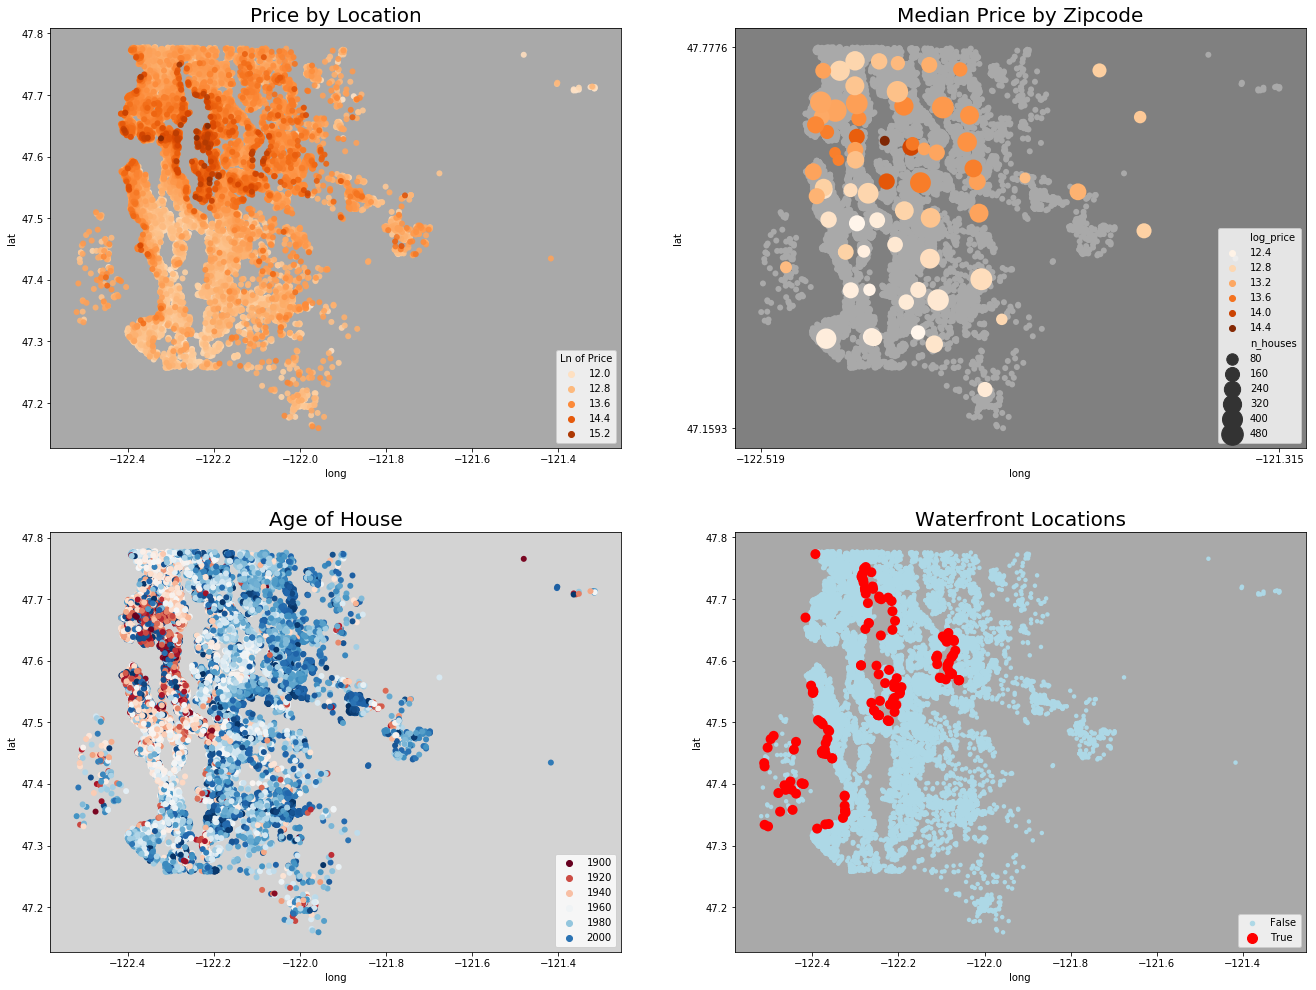

In [94]:
# make maps


# set the dimensions of the plot to be proportional
# to the ranges of latitude and longitude
lat_range = abs(df["lat"].max() - df["lat"].min())
long_range = abs(df["long"].max() - df["long"].min())

# generate subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16/(long_range*lat_range)+1, 16+1))

# map 1: log price by location
sns.scatterplot(x="long", y="lat", hue="log_price",
                data=df.sort_values("price"), palette="Oranges", alpha=0.9,
                 edgecolor="none", ax=ax1)

ax1.legend(loc="lower right", title="Ln of Price")
ax1.set_title("Price by Location", size=20)
ax1.set_facecolor("darkgray")


# map 2: median log price per zipcode by approximate zipcode locations
sns.scatterplot(x="long", y="lat", color="darkgrey", data=df, ax=ax2, 
                edgecolor="none", sizes=10**10)
sns.scatterplot(x="long", y="lat", data=zc_df, hue="log_price",
                palette="Oranges",size="n_houses", sizes=(100, 500),
                  edgecolor="none",ax=ax2)

ax2.legend(loc="lower right")
ax2.set_title("Median Price by Zipcode", size=20)
ax2.set_facecolor("gray")
ax2.set_xticks([df.long.min(), df.long.max()])
ax2.set_yticks([df.lat.min(), df.lat.max()])

# map 3: year built of houses by location
sns.scatterplot(x="long", y="lat", hue="yr_built", data=df,
               ax=ax3, edgecolor="none", palette="RdBu") # or Blues_r

ax3.legend(loc="lower right")
ax3.set_title("Age of House", size=20)
ax3.set_facecolor("lightgray")


# map 4: waterfront locations
sns.scatterplot(x="long", y="lat", data=df.sort_values("waterfront"), 
                hue="Is Waterfront", palette=["lightblue", "red"],
                size="Is Waterfront", sizes=(100, 20), edgecolor="none", ax=ax4)

ax4.legend(loc="lower right")
ax4.set_title("Waterfront Locations", size=20)
ax4.set_facecolor("darkgray")

plt.show()